<center><h1>Projeto 3 - Ciência dos Dados </h1></center>
<center><h5>Alexandre Zamberlan Filho</h5></center>
<center><h5>Caio Horschutz Fauza</h5></center>
<center><h5>Pedro Paulo Mendonça Telho</h5></center>
 

> <b>Tema:</b> Previsão da modalidade esportiva que um atleta, baseando-se em características pré-definidas, deve praticar.        
><b>Metodologia:</b> Clusterização  ou classificação (ainda em análise de performance)  
><b>Dataset utilizado:</b> "120 years of Olympic History of athletes and results" (Kaggle) 

# Parte 1: Coleta e Desenvolvimento dos dados

### 1.1 : Leitura do dataset "120 years of Olympic History of athletes and results"

In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

geral = pd.read_csv("athlete_events.csv")
geral.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 1.2: Análise primária baseadas nos dados

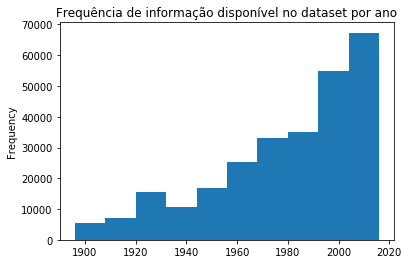

In [3]:
geral["Year"].plot.hist(title = "Frequência de informação disponível no dataset por ano")

In [4]:
sports  = pd.unique(geral["Sport"]).tolist()
versions = pd.unique(geral["Games"]).tolist()
citys = pd.unique(geral["City"]).tolist()

print("Quantidade de modalidades disponíveis no dataframe: " + str(len(sports)))
print("Quantidade de versões dos jogos olímpicos disponíveis no dataframe: " + str(len(versions)))
print("Quantidade de cidades sedes dos jogos olímpicos disponíveis no dataframe (Verão + Inverno): " + str(len(citys)))

Quantidade de modalidades disponíveis no dataframe: 66
Quantidade de versões dos jogos olímpicos disponíveis no dataframe: 51
Quantidade de cidades sedes dos jogos olímpicos disponíveis no dataframe (Verão + Inverno): 42


Média de peso dos atletas: 70.70239290053351


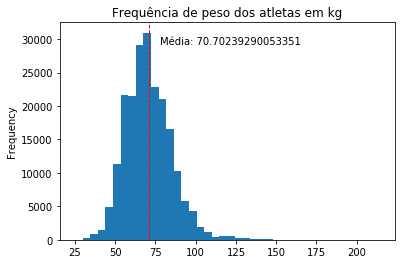

In [5]:
geral["Weight"].plot.hist(title = "Frequência de peso dos atletas em kg", bins=40)

plt.axvline(geral["Weight"].mean(), color='r', linestyle='dashed', linewidth=1)

_, max_ = plt.ylim()

plt.text(geral["Weight"].mean() + geral["Weight"].mean()/10, max_ - max_/10, 'Média: {}'.format(geral["Weight"].mean()))

print("Média de peso dos atletas: " + str(np.mean(geral["Weight"])))

É notavel assimetria nos dados em relação ao peso dos atletas. Os índices de maiores frequências estão localizados entre 50 e 80 kg aproximadamente.

Média de altura dos atletas: 175.33896987366376


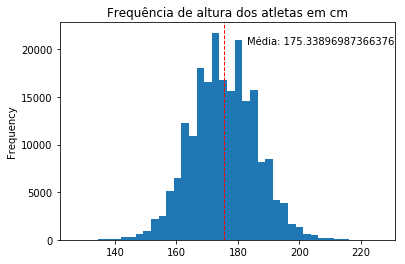

In [6]:
geral["Height"].plot.hist(title = "Frequência de altura dos atletas em cm", bins=40)

plt.axvline(geral["Height"].mean(), color='r', linestyle='dashed', linewidth=1)

_, max_ = plt.ylim()

plt.text(geral["Height"].mean() + geral["Height"].mean()/23, max_ - max_/10, 'Média: {}'.format(geral["Height"].mean()))

print("Média de altura dos atletas: " + str(np.mean(geral["Height"])))

É possível definir uma pequena simetria, de pouco valor nos dados relacionados a altura. Os índices de maiores frequências estão localizados entre 1,7 m e 1,85m aproximadamente.

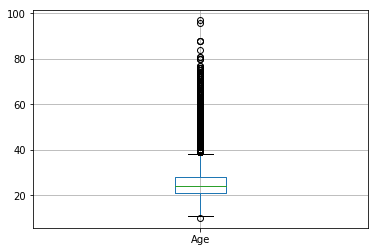

In [7]:
geral.loc[:,["Age"]].boxplot()

Média de idade dos atletas: 25.556898357297374


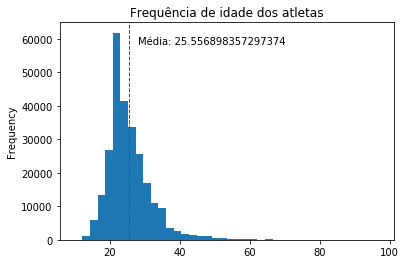

In [8]:
geral["Age"].plot.hist(title ="Frequência de idade dos atletas", bins=40)

plt.axvline(geral["Age"].mean(), color='r', linestyle='dashed', linewidth=1)

_, max_ = plt.ylim()

plt.text(geral["Age"].mean() + geral["Age"].mean()/10, max_ - max_/10, 'Média: {}'.format(geral["Age"].mean()))

print("Média de idade dos atletas: " + str(np.mean(geral["Age"])))

### 1.3 Análise da correlação entre os dados

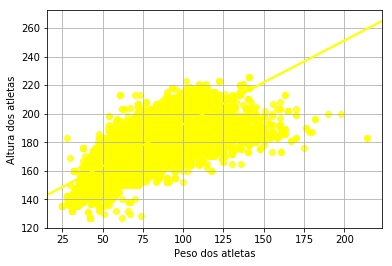

Índice de correlação (R) entre o peso e a altura dos atletas: 0.7962130921161656


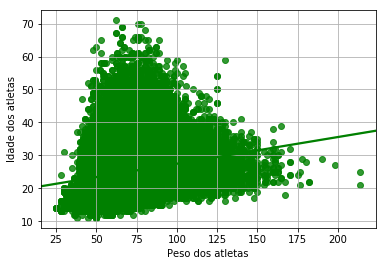

Índice de correlação (R) entre o peso e a idade dos atletas: 0.21206886474816442


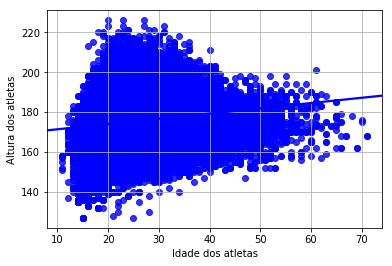

Índice de correlação (R) entre a idade a altura dos atletas: 0.13824647072838908


In [9]:
import numpy as np
import seaborn as sns

grafico1 = sns.regplot(geral['Weight'], geral['Height'], color='yellow');
plt.xlabel('Peso dos atletas')
plt.ylabel('Altura dos atletas')
plt.grid()
plt.show()
print('Índice de correlação (R) entre o peso e a altura dos atletas: '+str(geral.corr()['Weight']['Height']))

grafico2 = sns.regplot(geral['Weight'], geral['Age'], color='green');
plt.xlabel('Peso dos atletas')
plt.ylabel('Idade dos atletas')
plt.grid()
plt.show()
print('Índice de correlação (R) entre o peso e a idade dos atletas: '+str(geral.corr()['Weight']['Age']))

grafico3 = sns.regplot(geral['Age'], geral['Height'], color='blue');
plt.xlabel('Idade dos atletas')
plt.ylabel('Altura dos atletas')
plt.grid()
plt.show()
print('Índice de correlação (R) entre a idade a altura dos atletas: '+str(geral.corr()['Age']['Height']))

Entre as três análises pode-se perceber que entre peso e altura dos atletas há maior correlação. Esse índice nos indica o nível de dependência entre as variáveis e, portanto, nos mostra que essas duas variáveis são mais importantes se analisadas juntas.

### 1.4: Exemplo de aplicação da técnica

A técnica utilizada dependerá do teste de performance comparativo entre um algorítimo cluster e um classificador, sendo escolhido o de melhor desempenho.

#### Clusterização:
   O algorítimo de clusterização seguirá o método K-Means e DBSCAN da biblioteca scikit learn. Os modelos foram escolhidos devido a grande quantidade de dados, que é mais adequada se for aplicada em tais métodos. Será executado um código que interpreta índices determinados previamente e faz a previsão de qual esporte um atleta deve praticar, se baseando em algumas características.
    
#### Classificação:
   O algorítimo de classificação seguirá o método SGD classifier da biblioteca scikit learn. O modelo foi escolhido por ser apropriado para um grande número de dados. Será feita uma classificação dos dados existentes para prever qual esporte um atleta deveria praticar.
    

### 2: Algorítimo:

#### 2.1 Separação e visualização dos índices utilizados para o machine learning (Idade, Peso e Altura)

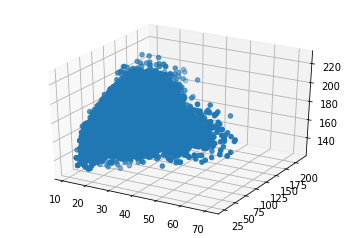

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

geraldados = geral.loc[:,("Age", "Height", "Weight")]
geraldados2 = geraldados[geral.Season == "Summer"]
dados = geraldados2.dropna()

plt3d = plt.figure().gca(projection="3d")
plt3d.scatter(dados.Age, dados.Weight, dados.Height)

#### 2.2: Clusterização (Machine Learning não supervisionado)

Inicialmente, foi testada a metodologia K-Means (devido ao grande número de dados) da biblioteca scikit learn, levando em consideração para a clusterização altura dos atletas, idade e peso, como índices para separação em grupos. O número de clusters selecionado foi o número total de esportes disponíveis no dataframe. Todos os esportes de verão foram considerados. 

In [2]:
#Separação em Base de treinamento/testes

from sklearn.model_selection import train_test_split
datatrain, datatest = train_test_split(geral, test_size = 0.2)

In [3]:
#MiniBatchKMeans
sports = pd.unique(datatrain["Sport"]).tolist()
nclusters = len(datatrain["Sport"].value_counts())


trainloc = datatrain.loc[:,("Age", "Height", "Weight")]
trainsummer = trainloc[datatrain.Season == "Summer"]
traindados = trainsummer.dropna()

minibatch = cluster.MiniBatchKMeans(n_clusters= nclusters, random_state = 0)

output = minibatch.fit_predict(traindados)

grupos = pd.DataFrame(datatrain.Sport)
grupos['Grupo'] = pd.Series(output)
pd.crosstab(grupos.Sport, grupos.Grupo)

Grupo,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0
Sport,,,,,,,,,,,,,,,,,,,,,
Alpine Skiing,47,73,100,83,122,55,32,40,58,21,...,86,69,21,20,56,75,37,83,86,72
Alpinism,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Archery,9,17,19,14,25,12,8,13,14,7,...,17,23,5,3,12,20,6,30,18,16
Art Competitions,27,40,28,27,58,27,14,20,31,11,...,23,25,9,14,18,37,19,30,31,28
Athletics,193,323,388,294,544,217,154,198,225,93,...,298,284,77,93,207,338,188,374,389,252
Badminton,7,12,8,11,17,7,3,5,9,4,...,4,15,3,4,7,8,5,11,15,7
Baseball,2,6,9,6,10,3,1,7,3,1,...,5,9,1,3,5,11,8,9,10,3
Basketball,29,26,41,39,72,15,7,15,24,17,...,29,39,15,15,27,33,25,42,40,25
Basque Pelota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Com a aplicação do método, foi perceptível a dominância da modalidade atletismo em todos os grupos, o que invalida tal método. Então, foi testado outro método do scikit learn para a clusterização: o DBSCAN (devido ao grande número de dados). Os mesmos índices anteriores foram utilizados, além de serem levados em consideração todos os esportes.

In [4]:
#DBSCAN 
from sklearn.cluster import DBSCAN

trainloc = datatrain.loc[:,("Age", "Height", "Weight")]
trainsummer = trainloc[datatrain.Season == "Summer"]
traindados = trainsummer.dropna()


dbscan = cluster.DBSCAN()
output = dbscan.fit_predict(traindados)

grupos = pd.DataFrame(datatrain.Sport)
grupos['Grupo'] = pd.Series(output)
tabela = pd.crosstab(grupos.Sport, grupos.Grupo)
tabela

Grupo,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,8399.0,8400.0,8401.0,8402.0,8403.0,8404.0,8405.0,8406.0,8407.0,8408.0
Sport,,,,,,,,,,,,,,,,,,,,,
Alpine Skiing,1072,0,2,0,0,1,1,3,0,0,...,1,0,0,0,0,0,0,0,0,1
Alpinism,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Archery,249,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art Competitions,467,2,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Athletics,4439,2,1,4,1,2,3,12,1,1,...,0,1,1,0,2,1,2,1,2,0
Badminton,153,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Baseball,94,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Basketball,502,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Basque Pelota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


O método DBSCAN também não foi adequado, uma vez que resultou em um número muito grande de grupos e na concentração dos dados em 1 único grupo, em que também é notável a dominância do atletismo.

Partindo disso, foi decidido simplificar e tentar utilizar alguns esportes selecionados:

In [5]:
geral7 = pd.concat([geral[geral.Sport=="Basketball"], geral[geral.Sport=="Wrestling"], geral[geral.Sport=="Swimming"], 
                   geral[geral.Sport=="Shooting"], geral[geral.Sport=="Athletics"], geral[geral.Sport=="Gymnastics"],
                   geral[geral.Sport=="Equestrianism"]])

from sklearn.model_selection import train_test_split
datatrain, datatest = train_test_split(geral7, test_size = 0.2)


In [6]:
nclusters = len(datatrain["Sport"].value_counts())


select = datatrain.loc[:,("Age", "Height", "Weight")]
select1 = select.dropna()

minibatch1 = cluster.MiniBatchKMeans(random_state = 0)
output1 = minibatch1.fit_predict(select1)

grupos = pd.DataFrame(datatrain.Sport)
grupos['Grupo'] = pd.Series(output1)
tabela = pd.crosstab(grupos.Sport, grupos.Grupo)

tabela


Grupo,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Sport,,,,,,,,
Athletics,616,869,2303,788,253,1606,491,1749
Basketball,80,105,271,98,31,157,74,204
Equestrianism,130,153,354,134,45,263,105,316
Gymnastics,361,535,1391,472,125,911,328,997
Shooting,177,261,711,221,63,452,143,490
Swimming,380,470,1343,422,142,905,302,1027
Wrestling,122,133,406,132,40,263,88,321


Mesmo com um número menor de esportes, o clustering não foi adequado, devido a dominância do grupo atletismo em todos os grupos criados. Então, foi decidido partir para um classificador.

#### 2.2: Classificador.

O Machine Learning SVC é um modelo matemático da biblioteca scikit-learn que envolvem os classificadores por SVM ("Support Vector Machine"). Eles funcionam através da utilização de um vetor característico em uma array que divide e classificam os dados da seguinte forma:

<img src = "image.png">

Fonte: https://en.wikipedia.org/wiki/Support_vector_machine#/media/File:Kernel_Machine.svg




A escolha do SVC dentro da biblioteca SVM foi obtida pela quantidade de amostras dentro dos casos em estudo (número de amostras menor que 100 mil amostras).

Primeiramente, organiza-se as linhas do Dataframe retirando aquelas que não possuem dados e separanda para análise as características necessárias para criação do Machine Learning (Idade, Altura e Peso dos atletas).

In [18]:
analise = geral7[["Age", "Height", "Weight", "Sport"]]
analise_nan = analise.dropna()
caracter = analise_nan[["Age", "Height", "Weight"]]
esportes = analise_nan["Sport"]

Transformando os dados em array pois é assim que o machine learning realiza suas análises.

In [19]:
X = np.array(caracter)
y = np.array(esportes)

Separamos agora 20% dos dados para base de testes e 80% dos dados para base de treinamento.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Finalmente aplicamos os dados obtidos às funções do nosso classificador.

In [21]:
from sklearn.svm import SVC

clf = SVC(gamma='auto', kernel='rbf', C = 1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

Decidimos utilizar o classificador SVC devido a quantidade de dados inferior a 100 mil amostras.

In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred)
    
print('Acurácia: {}'.format(acc))

Acurácia: 0.6142191142191142


### 3: Relatório:

Primeiramente foi feita a escolha do estudo do trabalho e uma pergunta, a qual o modelo procura responder com os dados. Neste caso, o tema escolhido foi as Olimpíadas e portanto foram recolhidas informações de milhares de atletas participantes de eventos passados. A partir disto, a pergunta foi criada, sendo estabelecida como "Dado um certo atleta, em qual esporte seu perfil se enquadra?". Com o objetivo definido, o projeto recebeu o direcionamento necessário.

E então foi feita a leitura dos dados, e assim que esta estava completa, uma direção para a análise foi estabelecida. O caminho decidido foi tomar como base os dados que dizem respeito às propriedades físicas do atleta, abrindo portas para um modelo corporal ideal para cada esporte. As características levadas em conta foram a altura, a idade e o peso, visto que estas tem uma boa relação entre si, além de uma variação entre esportes diferentes.

Com os dados organizados e o projeto já direcionado, o próximo passo ocorreu na separação dos dados, ou seja, na utilização do método. O grupo decidiu utilizar primeiramente a aplicação do método "Clustering" visto que este pode indicar padrões não óbvios ou encaixar no melhor modelo desde o ínicio. Com o caminho em vista, ocorreu a divisão da base de dados em treinamento e em teste ( 80% e 20% respectivamente ). Dado que a quantidade de dados ultrapassa a quantidade de 100 milhares, a metodologia em uso foi a "K-Means", indicada ao trabalhar com base de dado maiores ( 100 mil ou mais). Entretanto, após a aplicação deste, o grupo do esporte Atletismo dominou todos os grupos visto que possue maior quantidade desde o começo. A metodologia foi então revisitada e o método "DBSCAN" foi utilizado. Todavia, ao aplicá-lo, a dominância do esporte atletismo continuou e o número de grupos passou de 66 para 8390, provando que a metodologia escolhida ainda não estava sendo suficiente. Partindo disto, o número de esportes foi reduzido com o objetivo de simplificação. Os esportes com características mais diferentes entre si foram escolhidos para representar sua área e então a base de dados passou de 66 esportes para apenas 7. Dado isto, o método do clustering foi novamente testado na base atual, e novamente falhou, mostrando a mesma prevalência do esporte atletismo. Após todas estas iterações, a decisão do método de separação foi reformulada, descartando o clustering para trabalhar com a ideia de um classificador, ou seja, direcionar a separação.

Ao treinar o modelo com sua base, este foi então posto ao teste de comparação com a base de teste. Devido à quantidade baixa de dados ( inferior a 100 mil visto que considera apenas 7 esportes ), o modelo de classificador SVC foi escolhido como a direção de nosso projeto. Após a aplicação deste, um teste de acurácia foi aplicado com o intuito de provar sua eficácia. O modelo então treinado pela base contendo 80% dos dados foi aplicada sobre a base de testes contendo 20% dos mesmos. Com uma porcentagem de acertos em 61,35% das vezes, o modelo foi por fim considerado apropriado e satisfatório para responder a pergunta inicial.

Para conclusão, o grupo realizou o teste de dois separadores diferentes, definindo o melhor entre eles e testou e iterou 4 métodos para então escolher o melhor para a finalização do projeto. Com uma acurácia de quase dois terços, as decisões e caminhos realizados foram então considerados suficientes e satisfatórios para responder à pergunta inicial.

### 3.1: Visualização dos resultados:

Para melhor visualização do que foi classificado com o resultado real, utilizamos a matriz de confusão;


In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[4827,   41,   69,  627,  152,  670,   98],
       [ 348,  169,    6,   13,   10,  167,    4],
       [ 385,    2,  272,   63,  133,   14,    4],
       [ 546,    0,    2, 2977,   12,  135,   16],
       [ 589,    2,  112,  148,  504,   46,   52],
       [1247,   45,    2,  341,   11, 2148,   20],
       [ 472,    1,    8,  248,   55,   35,  170]], dtype=int64)

Para melhor visualização da matriz, utilizamos uma função disponível na documentação do scikit-learn:

Link: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

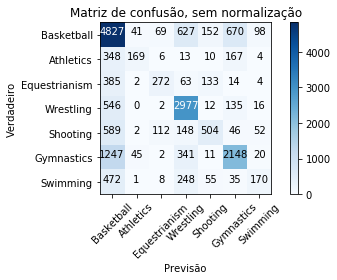

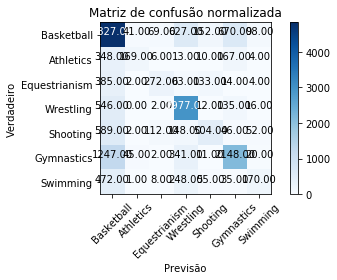

In [25]:
import itertools
from sklearn.metrics import confusion_matrix

class_names = list(set(esportes))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsão')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusão, sem normalização')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusão normalizada')

plt.show()

Na Matriz de Confusão acima, é possível visualizar quantos atletas de determinada categoria foram previstos no mesmo esporte ou em outros.

Divisão do Projeto:

Análise exploratória parte 1: Caio  
Análise exploratória parte 2: Pedro Paulo  
Clustering teste: Caio  
Classificador SVC: Pedro Paulo  
Teste de acurácia: Alexandre  
Relatório: Alexandre  